In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Make a 'Get' request for the city weather.


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | litovko
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | loudi
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | thohoyandou
Processing Record 20 of Set 1 | tiruvottiyur
City not found. Skipping...
Processing Record 21 of Set 1 | sao borja
Processing Record 

Processing Record 37 of Set 4 | semporna
Processing Record 38 of Set 4 | sao filipe
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | tabuk
Processing Record 41 of Set 4 | evensk
Processing Record 42 of Set 4 | bafoulabe
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | mormugao
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | camocim
Processing Record 49 of Set 4 | falealupo
City not found. Skipping...
Processing Record 50 of Set 4 | bom jardim
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | meadow lake
Processing Record 3 of Set 5 | griffith
Processing Record 4 of Set 5 | kotaparh
Processing Record 5 of Set 5 | wanning
Processing Record 6 of Set 5 | quepos
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | emba
Processing Record 9 of Set 5 | chuy
Processing Record 10 of Set 5 | awjilah
Processing Re

Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | birao
Processing Record 30 of Set 8 | byron bay
Processing Record 31 of Set 8 | batemans bay
Processing Record 32 of Set 8 | alofi
Processing Record 33 of Set 8 | ulvik
Processing Record 34 of Set 8 | bako
Processing Record 35 of Set 8 | morgantown
Processing Record 36 of Set 8 | antofagasta
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | kerman
Processing Record 39 of Set 8 | sumenep
Processing Record 40 of Set 8 | pokhara
Processing Record 41 of Set 8 | consett
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | saleaula
City not found. Skipping...
Processing Record 44 of Set 8 | hudson bay
Processing Record 45 of Set 8 | halalo
City not found. Skipping...
Processing Record 46 of Set 8 | knysna
Processing Record 47 of Set 8 | te anau
Processing Record 48 of Set 8 | flinders
Processing Record 49 of Set 8 | richards bay
Processing Record 50 of Set 8 | husavik
Processing Rec

Processing Record 16 of Set 12 | lamu
Processing Record 17 of Set 12 | alexandria
Processing Record 18 of Set 12 | ilebo
Processing Record 19 of Set 12 | winterberg
Processing Record 20 of Set 12 | verdalsora
City not found. Skipping...
Processing Record 21 of Set 12 | carutapera
Processing Record 22 of Set 12 | trabzon
Processing Record 23 of Set 12 | charyshskoye
Processing Record 24 of Set 12 | tiznit
Processing Record 25 of Set 12 | ardistan
City not found. Skipping...
Processing Record 26 of Set 12 | arzgir
Processing Record 27 of Set 12 | campbell river
Processing Record 28 of Set 12 | udankudi
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | umm kaddadah
Processing Record 31 of Set 12 | narasannapeta
Processing Record 32 of Set 12 | ourossogui
Processing Record 33 of Set 12 | tilichiki
Processing Record 34 of Set 12 | talnakh
Processing Record 35 of Set 12 | foso
Processing Record 36 of Set 12 | salinas
Processing Record 37 of Set 12 | cartagena
Process

In [105]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,59.02,41,75,36.82,CL,2021-12-03 17:03:57
1,Fortuna,40.5982,-124.1573,45.52,100,75,8.05,US,2021-12-03 17:03:58
2,Litovko,49.2361,135.1742,-15.25,100,49,1.79,RU,2021-12-03 17:03:58
3,Pisco,-13.7000,-76.2167,71.65,73,0,6.91,PE,2021-12-03 17:03:58
4,Loudi,27.7344,111.9944,50.47,45,32,1.74,CN,2021-12-03 17:03:59
5,Bluff,-46.6000,168.3333,58.80,95,79,6.08,NZ,2021-12-03 17:03:59
6,Carnarvon,-24.8667,113.6333,71.67,83,0,19.57,AU,2021-12-03 17:03:59
7,Qaanaaq,77.4840,-69.3632,12.97,95,100,2.98,GL,2021-12-03 17:04:00
8,Castro,-24.7911,-50.0119,75.20,56,79,4.21,BR,2021-12-03 17:01:10
9,Leningradskiy,69.3833,178.4167,11.84,82,81,11.90,RU,2021-12-03 17:04:00


In [106]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [107]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [108]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638560961.9177659

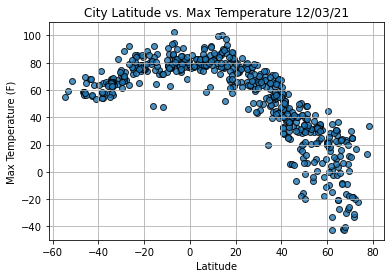

In [109]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

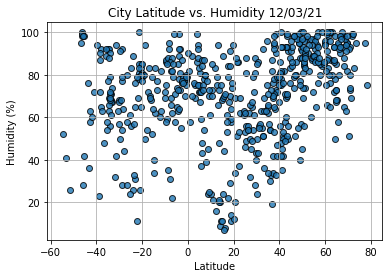

In [110]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

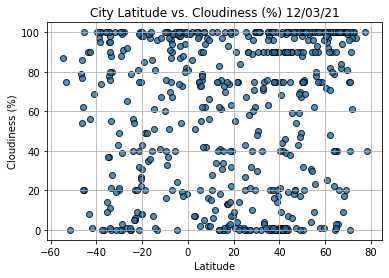

In [74]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

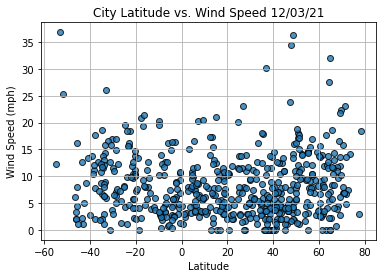

In [75]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [116]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [117]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                      Mataura
Lat                      -46.1927
Lng                      168.8643
Max Temp                    58.48
Humidity                      100
Cloudiness                     86
Wind Speed                   2.01
Country                        NZ
Date          2021-12-03 17:03:02
Name: 13, dtype: object

In [118]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
554     True
555     True
556    False
557     True
558    False
Name: Lat, Length: 559, dtype: bool

In [119]:
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Fortuna,40.5982,-124.1573,45.52,100,75,8.05,US,2021-12-03 17:03:58
2,Litovko,49.2361,135.1742,-15.25,100,49,1.79,RU,2021-12-03 17:03:58
4,Loudi,27.7344,111.9944,50.47,45,32,1.74,CN,2021-12-03 17:03:59
7,Qaanaaq,77.4840,-69.3632,12.97,95,100,2.98,GL,2021-12-03 17:04:00
9,Leningradskiy,69.3833,178.4167,11.84,82,81,11.90,RU,2021-12-03 17:04:00


In [120]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

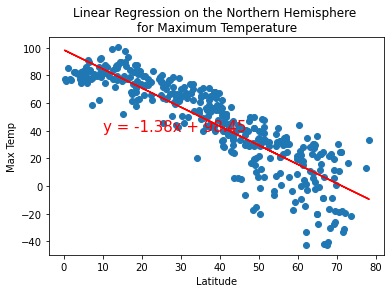

In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

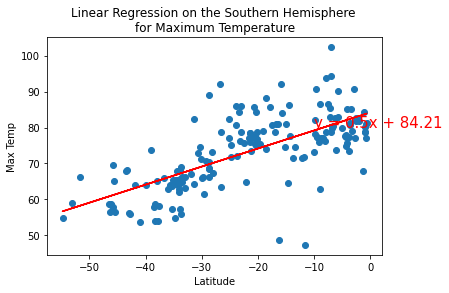

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-10,80))

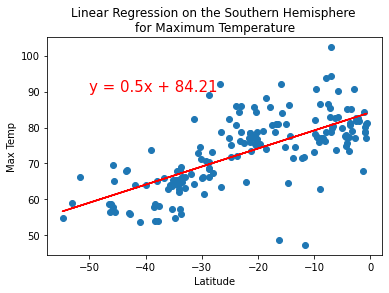

In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

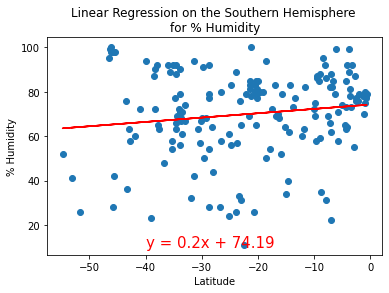

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-40,10))

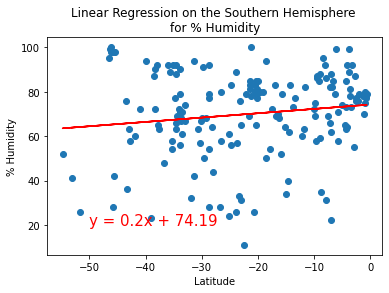

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,20))

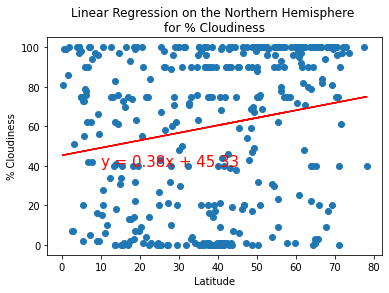

In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

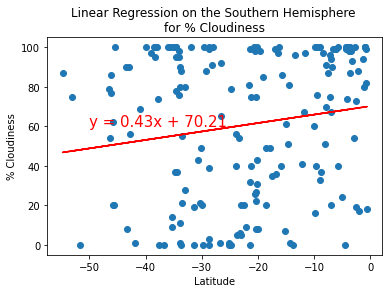

In [146]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

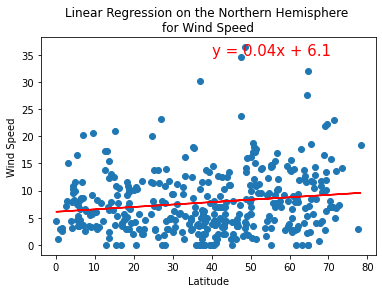

In [145]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))